# Seeding the environment

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [2]:
# Set seed value
seed_value = 56
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

# Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import mmread
from sklearn.preprocessing import MinMaxScaler

# Importing data

In [4]:
dir = '/home/DibyenduBSeal/DBS_HPC/scRNAseqTimeSeries/'

In [5]:
X = mmread(dir+'Data/E-GEOD-75140/E-GEOD-75140.aggregated_filtered_normalised_counts.mtx')

X

<25592x734 sparse matrix of type '<class 'numpy.float64'>'
	with 6360759 stored elements in COOrdinate format>

In [6]:
sparsity=636075900/(25592*734)
sparsity

33.861691920073795

# Pre-processing

Converting sparse matrix into dense

In [7]:
X_arr = X.toarray()
X_arr

array([[1.2461763e+02, 1.4229472e+02, 1.1054401e+03, ..., 1.7544176e+01,
        1.3709451e+00, 1.4930003e+02],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.3130432e+02, ..., 1.1754379e+01,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9968230e-01, 3.3200428e+01, 4.2365917e+01, ..., 5.9442020e+01,
        3.4273627e+00, 2.0139720e+01]])

In [8]:
X_arr.shape

(25592, 734)

In [9]:
pd.DataFrame(X_arr).describe()

,0,1,2,3,4,5,6,7,8,9,...,724,725,726,727,728,729,730,731,732,733
count,25592.000000,25592.000000,25592.000000,25592.000000,25592.000000,25592.000000,25592.000000,25592.000000,25592.000000,25592.000000,...,25592.000000,25592.000000,25592.000000,25592.000000,25592.000000,25592.000000,25592.000000,25592.000000,25592.000000,25592.000000
mean,39.074711,39.074714,39.074712,39.074708,39.074708,39.074711,39.074712,39.074715,39.074711,39.074710,...,39.074718,39.074709,39.074713,39.074711,39.074708,39.074711,39.074715,39.074714,39.074711,39.074708
std,233.501222,176.675091,175.834398,197.298105,214.804003,180.737088,227.194120,319.919887,204.767240,194.543116,...,264.368896,246.823425,226.434323,254.694344,299.243361,257.714731,280.107262,288.457868,286.871375,289.329681
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.155508,14.347571,11.886017,3.266263,2.324526,8.731954,4.892632,8.215266,6.415149,6.451866,...,2.460711,1.592761,3.455211,5.655280,1.407065,2.099760,3.808670,2.364901,0.768300,2.323814
max,12800.363000,13218.510000,11332.009000,12949.496000,15112.114000,11937.059000,16054.424000,30540.975000,13300.479000,16199.771000,...,16907.543000,15215.647000,15349.081000,17642.918000,22534.312000,16056.861000,24991.297000,24719.457000,17707.127000,18648.555000


Scaling

In [10]:
scaler = MinMaxScaler()
X_arr1=scaler.fit_transform(X_arr)
data = pd.DataFrame(X_arr1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,724,725,726,727,728,729,730,731,732,733
0,0.009735,0.010765,0.097550,0.007142,0.039573,0.039254,0.029819,0.011140,0.028298,0.044176,...,0.000184,0.000943,0.000000,0.000119,0.000000,0.000463,0.000321,0.000710,0.000077,0.008006
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.011587,0.000000,0.000050,0.004454,0.004185,0.000000,0.006753,0.005164,...,0.000000,0.001727,0.000000,0.000000,0.000000,0.000065,0.000000,0.000476,0.000000,0.000000
3,0.000248,0.001442,0.000736,0.000579,0.002009,0.000185,0.000180,0.000262,0.000876,0.000707,...,0.000206,0.006726,0.000344,0.000578,0.000126,0.000217,0.006617,0.000183,0.000432,0.000416
4,0.000156,0.000098,0.000539,0.000943,0.009990,0.000189,0.000128,0.000199,0.006950,0.000070,...,0.000000,0.010625,0.000228,0.000136,0.000000,0.005231,0.000087,0.000000,0.000116,0.000000


Extracting row names and column names

In [11]:
row_names = pd.read_csv(dir+'Data/E-GEOD-75140/E-GEOD-75140.aggregated_filtered_normalised_counts.mtx_rows',header=None,sep='\t')
col_names = pd.read_csv(dir+'Data/E-GEOD-75140/E-GEOD-75140.aggregated_filtered_normalised_counts.mtx_cols',header=None,sep='\t')

print(row_names.head())
print(col_names.head())

                 0                1
0  ENSG00000000003  ENSG00000000003
1  ENSG00000000005  ENSG00000000005
2  ENSG00000000419  ENSG00000000419
3  ENSG00000000457  ENSG00000000457
4  ENSG00000000460  ENSG00000000460
            0
0  SRR2967100
1  SRR2967101
2  SRR2967102
3  SRR2967103
4  SRR2967104


In [12]:
data.columns=list(col_names[0])
data.index=list(row_names[0])

data.head()

,SRR2967100,SRR2967101,SRR2967102,SRR2967103,SRR2967104,SRR2967105,SRR2967106,SRR2967107,SRR2967108,SRR2967109,...,SRR2967824,SRR2967825,SRR2967826,SRR2967827,SRR2967828,SRR2967829,SRR2967830,SRR2967831,SRR2967832,SRR2967833
ENSG00000000003,0.009735,0.010765,0.097550,0.007142,0.039573,0.039254,0.029819,0.011140,0.028298,0.044176,...,0.000184,0.000943,0.000000,0.000119,0.000000,0.000463,0.000321,0.000710,0.000077,0.008006
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,0.000000,0.000000,0.011587,0.000000,0.000050,0.004454,0.004185,0.000000,0.006753,0.005164,...,0.000000,0.001727,0.000000,0.000000,0.000000,0.000065,0.000000,0.000476,0.000000,0.000000
ENSG00000000457,0.000248,0.001442,0.000736,0.000579,0.002009,0.000185,0.000180,0.000262,0.000876,0.000707,...,0.000206,0.006726,0.000344,0.000578,0.000126,0.000217,0.006617,0.000183,0.000432,0.000416
ENSG00000000460,0.000156,0.000098,0.000539,0.000943,0.009990,0.000189,0.000128,0.000199,0.006950,0.000070,...,0.000000,0.010625,0.000228,0.000136,0.000000,0.005231,0.000087,0.000000,0.000116,0.000000


Removing lowly expressed genes

In [13]:
length=[]
for i in data.index:
  gen_val=[]
  for j in data.loc[i]:
    if j>0:
      gen_val.append(j)
  length.append(len(gen_val))

In [14]:
amount = [i/data.shape[1] for i in length]

In [15]:
pd.DataFrame(amount).describe()

,0
count,25592.000000
mean,0.338617
std,0.330210
min,0.004087
25%,0.024523
50%,0.231608
75%,0.628065
max,1.000000


In [16]:
df=pd.DataFrame(data=zip(data.index,amount))
df.head()

,0,1
0,ENSG00000000003,0.798365
1,ENSG00000000005,0.036785
2,ENSG00000000419,0.585831
3,ENSG00000000457,0.854223
4,ENSG00000000460,0.663488


In [17]:
assay=[]
cnt=[]
for i in range(len(df[1])):
  if df[1][i] > df[1].quantile(0.25):
    assay.append(df[0][i])
    cnt.append(df[1][i])

In [18]:
len(assay)

19037

In [19]:
work_data = data.loc[assay]
work_data

,SRR2967100,SRR2967101,SRR2967102,SRR2967103,SRR2967104,SRR2967105,SRR2967106,SRR2967107,SRR2967108,SRR2967109,...,SRR2967824,SRR2967825,SRR2967826,SRR2967827,SRR2967828,SRR2967829,SRR2967830,SRR2967831,SRR2967832,SRR2967833
ENSG00000000003,0.009735,0.010765,0.097550,0.007142,0.039573,0.039254,0.029819,0.011140,0.028298,0.044176,...,0.000184,0.000943,0.000000,0.000119,0.000000,0.000463,0.000321,0.000710,0.000077,0.008006
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,0.000000,0.000000,0.011587,0.000000,0.000050,0.004454,0.004185,0.000000,0.006753,0.005164,...,0.000000,0.001727,0.000000,0.000000,0.000000,0.000065,0.000000,0.000476,0.000000,0.000000
ENSG00000000457,0.000248,0.001442,0.000736,0.000579,0.002009,0.000185,0.000180,0.000262,0.000876,0.000707,...,0.000206,0.006726,0.000344,0.000578,0.000126,0.000217,0.006617,0.000183,0.000432,0.000416
ENSG00000000460,0.000156,0.000098,0.000539,0.000943,0.009990,0.000189,0.000128,0.000199,0.006950,0.000070,...,0.000000,0.010625,0.000228,0.000136,0.000000,0.005231,0.000087,0.000000,0.000116,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000288556,0.000000,0.000339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000109,...,0.000000,0.000000,0.000000,0.000067,0.000000,0.000000,0.000000,0.000785,0.000000,0.000000
ENSG00000288558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002067,...,0.000000,0.000000,0.000000,0.001315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000288564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Metadata

In [20]:
exp_data = pd.read_csv(dir+'Data/E-GEOD-75140/ExpDesign-E-GEOD-75140.tsv', delimiter="\t")
exp_data.head()

,Assay,Sample Characteristic[organism],Sample Characteristic Ontology Term[organism],Sample Characteristic[individual],Sample Characteristic Ontology Term[individual],Sample Characteristic[age],Sample Characteristic Ontology Term[age],Sample Characteristic[developmental stage],Sample Characteristic Ontology Term[developmental stage],Sample Characteristic[sex],...,Factor Value[time],Factor Value Ontology Term[time],Factor Value[individual],Factor Value Ontology Term[individual],Factor Value[cell type],Factor Value Ontology Term[cell type],Factor Value[cell line],Factor Value Ontology Term[cell line],Factor Value[sampling site],Factor Value Ontology Term[sampling site]
0,SRR2967100,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,iPSC organoid 1,NaN,36 year,NaN,adult,http://www.ebi.ac.uk/efo/EFO_0001272,female,...,33 day,NaN,iPSC organoid 1,NaN,induced pluripotent stem cell,http://www.ebi.ac.uk/efo/EFO_0004905,409B2,NaN,whole cerebral organoid,NaN
1,SRR2967101,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,iPSC organoid 1,NaN,36 year,NaN,adult,http://www.ebi.ac.uk/efo/EFO_0001272,female,...,33 day,NaN,iPSC organoid 1,NaN,induced pluripotent stem cell,http://www.ebi.ac.uk/efo/EFO_0004905,409B2,NaN,whole cerebral organoid,NaN
2,SRR2967102,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,iPSC organoid 1,NaN,36 year,NaN,adult,http://www.ebi.ac.uk/efo/EFO_0001272,female,...,33 day,NaN,iPSC organoid 1,NaN,induced pluripotent stem cell,http://www.ebi.ac.uk/efo/EFO_0004905,409B2,NaN,whole cerebral organoid,NaN
3,SRR2967103,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,iPSC organoid 1,NaN,36 year,NaN,adult,http://www.ebi.ac.uk/efo/EFO_0001272,female,...,33 day,NaN,iPSC organoid 1,NaN,induced pluripotent stem cell,http://www.ebi.ac.uk/efo/EFO_0004905,409B2,NaN,whole cerebral organoid,NaN
4,SRR2967104,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,iPSC organoid 1,NaN,36 year,NaN,adult,http://www.ebi.ac.uk/efo/EFO_0001272,female,...,33 day,NaN,iPSC organoid 1,NaN,induced pluripotent stem cell,http://www.ebi.ac.uk/efo/EFO_0004905,409B2,NaN,whole cerebral organoid,NaN


In [21]:
exp_data.shape

(734, 37)

In [22]:
exp_data.columns

Index(['Assay', 'Sample Characteristic[organism]',
       'Sample Characteristic Ontology Term[organism]',
       'Sample Characteristic[individual]',
       'Sample Characteristic Ontology Term[individual]',
       'Sample Characteristic[age]',
       'Sample Characteristic Ontology Term[age]',
       'Sample Characteristic[developmental stage]',
       'Sample Characteristic Ontology Term[developmental stage]',
       'Sample Characteristic[sex]',
       'Sample Characteristic Ontology Term[sex]',
       'Sample Characteristic[organism part]',
       'Sample Characteristic Ontology Term[organism part]',
       'Sample Characteristic[progenitor cell type]',
       'Sample Characteristic Ontology Term[progenitor cell type]',
       'Sample Characteristic[cell type]',
       'Sample Characteristic Ontology Term[cell type]',
       'Sample Characteristic[cell line]',
       'Sample Characteristic Ontology Term[cell line]',
       'Sample Characteristic[sampling site]',
       'Sample Cha

Pre-processing the metadata

In [23]:
exp_data.drop(list(exp_data.filter(regex = 'Sample Characteristic Ontology Term')), axis = 1, inplace = True)

In [24]:
exp_data.columns

Index(['Assay', 'Sample Characteristic[organism]',
       'Sample Characteristic[individual]', 'Sample Characteristic[age]',
       'Sample Characteristic[developmental stage]',
       'Sample Characteristic[sex]', 'Sample Characteristic[organism part]',
       'Sample Characteristic[progenitor cell type]',
       'Sample Characteristic[cell type]', 'Sample Characteristic[cell line]',
       'Sample Characteristic[sampling site]',
       'Sample Characteristic[growth condition]',
       'Sample Characteristic[disease]',
       'Factor Value[single cell identifier]',
       'Factor Value Ontology Term[single cell identifier]',
       'Factor Value[time]', 'Factor Value Ontology Term[time]',
       'Factor Value[individual]', 'Factor Value Ontology Term[individual]',
       'Factor Value[cell type]', 'Factor Value Ontology Term[cell type]',
       'Factor Value[cell line]', 'Factor Value Ontology Term[cell line]',
       'Factor Value[sampling site]',
       'Factor Value Ontology Term[s

In [25]:
exp_data.drop(list(exp_data.filter(regex = 'Factor Value Ontology Term')), axis = 1, inplace = True)

In [26]:
exp_data.columns

Index(['Assay', 'Sample Characteristic[organism]',
       'Sample Characteristic[individual]', 'Sample Characteristic[age]',
       'Sample Characteristic[developmental stage]',
       'Sample Characteristic[sex]', 'Sample Characteristic[organism part]',
       'Sample Characteristic[progenitor cell type]',
       'Sample Characteristic[cell type]', 'Sample Characteristic[cell line]',
       'Sample Characteristic[sampling site]',
       'Sample Characteristic[growth condition]',
       'Sample Characteristic[disease]',
       'Factor Value[single cell identifier]', 'Factor Value[time]',
       'Factor Value[individual]', 'Factor Value[cell type]',
       'Factor Value[cell line]', 'Factor Value[sampling site]'],
      dtype='object')

In [27]:
exp_data

,Assay,Sample Characteristic[organism],Sample Characteristic[individual],Sample Characteristic[age],Sample Characteristic[developmental stage],Sample Characteristic[sex],Sample Characteristic[organism part],Sample Characteristic[progenitor cell type],Sample Characteristic[cell type],Sample Characteristic[cell line],Sample Characteristic[sampling site],Sample Characteristic[growth condition],Sample Characteristic[disease],Factor Value[single cell identifier],Factor Value[time],Factor Value[individual],Factor Value[cell type],Factor Value[cell line],Factor Value[sampling site]
0,SRR2967100,Homo sapiens,iPSC organoid 1,36 year,adult,female,skin,fibroblast,induced pluripotent stem cell,409B2,whole cerebral organoid,organoid culture,normal,whOrg1_B12_hOrg33d_c2,33 day,iPSC organoid 1,induced pluripotent stem cell,409B2,whole cerebral organoid
1,SRR2967101,Homo sapiens,iPSC organoid 1,36 year,adult,female,skin,fibroblast,induced pluripotent stem cell,409B2,whole cerebral organoid,organoid culture,normal,whOrg1_B1_hOrg33d_c2,33 day,iPSC organoid 1,induced pluripotent stem cell,409B2,whole cerebral organoid
2,SRR2967102,Homo sapiens,iPSC organoid 1,36 year,adult,female,skin,fibroblast,induced pluripotent stem cell,409B2,whole cerebral organoid,organoid culture,normal,whOrg1_B6_hOrg33d_c2,33 day,iPSC organoid 1,induced pluripotent stem cell,409B2,whole cerebral organoid
3,SRR2967103,Homo sapiens,iPSC organoid 1,36 year,adult,female,skin,fibroblast,induced pluripotent stem cell,409B2,whole cerebral organoid,organoid culture,normal,whOrg1_B7_hOrg33d_c2,33 day,iPSC organoid 1,induced pluripotent stem cell,409B2,whole cerebral organoid
4,SRR2967104,Homo sapiens,iPSC organoid 1,36 year,adult,female,skin,fibroblast,induced pluripotent stem cell,409B2,whole cerebral organoid,organoid culture,normal,whOrg1_C10_hOrg33d_c2,33 day,iPSC organoid 1,induced pluripotent stem cell,409B2,whole cerebral organoid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,SRR2967829,Homo sapiens,fetal human cortex 3,gestational week 13 week,embryo,not available,neocortex,not applicable,neuron,not applicable,not applicable,in vivo,normal,fetal3_H5_fetal_13wpc,not applicable,fetal human cortex 3,neuron,not applicable,not applicable
730,SRR2967830,Homo sapiens,fetal human cortex 3,gestational week 13 week,embryo,not available,neocortex,not applicable,neuron,not applicable,not applicable,in vivo,normal,fetal3_H6_fetal_13wpc,not applicable,fetal human cortex 3,neuron,not applicable,not applicable
731,SRR2967831,Homo sapiens,fetal human cortex 3,gestational week 13 week,embryo,not available,neocortex,not applicable,neuron,not applicable,not applicable,in vivo,normal,fetal3_H7_fetal_13wpc,not applicable,fetal human cortex 3,neuron,not applicable,not applicable
732,SRR2967832,Homo sapiens,fetal human cortex 3,gestational week 13 week,embryo,not available,neocortex,not applicable,neuron,not applicable,not applicable,in vivo,normal,fetal3_H8_fetal_13wpc,not applicable,fetal human cortex 3,neuron,not applicable,not applicable


Removing identical columns

In [28]:
exp_data.drop(['Factor Value[individual]','Factor Value[cell type]','Factor Value[sampling site]','Factor Value[cell line]'],axis=1,inplace=True)
exp_data.columns

Index(['Assay', 'Sample Characteristic[organism]',
       'Sample Characteristic[individual]', 'Sample Characteristic[age]',
       'Sample Characteristic[developmental stage]',
       'Sample Characteristic[sex]', 'Sample Characteristic[organism part]',
       'Sample Characteristic[progenitor cell type]',
       'Sample Characteristic[cell type]', 'Sample Characteristic[cell line]',
       'Sample Characteristic[sampling site]',
       'Sample Characteristic[growth condition]',
       'Sample Characteristic[disease]',
       'Factor Value[single cell identifier]', 'Factor Value[time]'],
      dtype='object')

Renaming the column names

In [29]:
exp_data.columns = ['Assay','Organism','Individual','Age','Developmental Stage','Sex','Organism Part','Progenitor Cell Type','Cell Type','Cell Line','Sampling Site','Growth Condition','Disease','Single Cell Identifier','Time']
exp_data.head()

,Assay,Organism,Individual,Age,Developmental Stage,Sex,Organism Part,Progenitor Cell Type,Cell Type,Cell Line,Sampling Site,Growth Condition,Disease,Single Cell Identifier,Time
0,SRR2967100,Homo sapiens,iPSC organoid 1,36 year,adult,female,skin,fibroblast,induced pluripotent stem cell,409B2,whole cerebral organoid,organoid culture,normal,whOrg1_B12_hOrg33d_c2,33 day
1,SRR2967101,Homo sapiens,iPSC organoid 1,36 year,adult,female,skin,fibroblast,induced pluripotent stem cell,409B2,whole cerebral organoid,organoid culture,normal,whOrg1_B1_hOrg33d_c2,33 day
2,SRR2967102,Homo sapiens,iPSC organoid 1,36 year,adult,female,skin,fibroblast,induced pluripotent stem cell,409B2,whole cerebral organoid,organoid culture,normal,whOrg1_B6_hOrg33d_c2,33 day
3,SRR2967103,Homo sapiens,iPSC organoid 1,36 year,adult,female,skin,fibroblast,induced pluripotent stem cell,409B2,whole cerebral organoid,organoid culture,normal,whOrg1_B7_hOrg33d_c2,33 day
4,SRR2967104,Homo sapiens,iPSC organoid 1,36 year,adult,female,skin,fibroblast,induced pluripotent stem cell,409B2,whole cerebral organoid,organoid culture,normal,whOrg1_C10_hOrg33d_c2,33 day


In [30]:
exp_data['Time'].value_counts()

not applicable    226
53 day             96
65 day             80
58 day             79
41 day             74
37 day             71
35 day             68
33 day             40
Name: Time, dtype: int64

In [31]:
exp_data['Developmental Stage'].value_counts()

#We aim to predict the 226 embryonic data

adult         412
embryo        226
blastocyst     96
Name: Developmental Stage, dtype: int64

In [32]:
exp_data['Age'].value_counts()

36 year                     412
gestational week 12 week    164
not applicable               96
gestational week 13 week     62
Name: Age, dtype: int64

In [33]:
time_points = list(exp_data['Time'].value_counts().index)
time_points

['not applicable',
 '53 day',
 '65 day',
 '58 day',
 '41 day',
 '37 day',
 '35 day',
 '33 day']

In [34]:
time_points[1],time_points[2] = time_points[2],time_points[1]
time_points[2],time_points[3] = time_points[3],time_points[2]
time_points = time_points[::-1]
time_points

['33 day',
 '35 day',
 '37 day',
 '41 day',
 '53 day',
 '58 day',
 '65 day',
 'not applicable']

In [35]:
merging_data = exp_data[['Assay','Time']]

Making the assays, the columns of main data for merging

In [36]:
transp_data = work_data.T
transp_data['Assay'] = transp_data.index
transp_data.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000288380,ENSG00000288525,ENSG00000288529,ENSG00000288534,ENSG00000288550,ENSG00000288556,ENSG00000288558,ENSG00000288564,ENSG00000288579,Assay
SRR2967100,0.009735,0.0,0.000000,0.000248,0.000156,0.000000,0.000078,0.000000,0.000156,0.000318,...,0.000000,0.000078,0.0,0.0,0.0,0.000000,0.0,0.0,0.000078,SRR2967100
SRR2967101,0.010765,0.0,0.000000,0.001442,0.000098,0.000085,0.000085,0.000303,0.000000,0.001015,...,0.000000,0.000169,0.0,0.0,0.0,0.000339,0.0,0.0,0.002512,SRR2967101
SRR2967102,0.097550,0.0,0.011587,0.000736,0.000539,0.000139,0.000278,0.000164,0.000208,0.000592,...,0.000081,0.001110,0.0,0.0,0.0,0.000000,0.0,0.0,0.003739,SRR2967102
SRR2967103,0.007142,0.0,0.000000,0.000579,0.000943,0.000000,0.002105,0.000184,0.000000,0.000437,...,0.000096,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.001887,SRR2967103
SRR2967104,0.039573,0.0,0.000050,0.002009,0.009990,0.000000,0.000050,0.000000,0.000050,0.000000,...,0.001314,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000943,SRR2967104


In [37]:
merged_data = pd.merge(transp_data,merging_data,how='right',on='Assay')
merged_data

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000288525,ENSG00000288529,ENSG00000288534,ENSG00000288550,ENSG00000288556,ENSG00000288558,ENSG00000288564,ENSG00000288579,Assay,Time
0,0.009735,0.0,0.000000,0.000248,0.000156,0.000000,0.000078,0.000000,0.000156,0.000318,...,0.000078,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000078,SRR2967100,33 day
1,0.010765,0.0,0.000000,0.001442,0.000098,0.000085,0.000085,0.000303,0.000000,0.001015,...,0.000169,0.0,0.000000,0.0,0.000339,0.0,0.0,0.002512,SRR2967101,33 day
2,0.097550,0.0,0.011587,0.000736,0.000539,0.000139,0.000278,0.000164,0.000208,0.000592,...,0.001110,0.0,0.000000,0.0,0.000000,0.0,0.0,0.003739,SRR2967102,33 day
3,0.007142,0.0,0.000000,0.000579,0.000943,0.000000,0.002105,0.000184,0.000000,0.000437,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.001887,SRR2967103,33 day
4,0.039573,0.0,0.000050,0.002009,0.009990,0.000000,0.000050,0.000000,0.000050,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000943,SRR2967104,33 day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,0.000463,0.0,0.000065,0.000217,0.005231,0.000000,0.000588,0.000000,0.007781,0.000067,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.001992,SRR2967829,not applicable
730,0.000321,0.0,0.000000,0.006617,0.000087,0.000000,0.000528,0.000052,0.000650,0.000601,...,0.001951,0.0,0.000082,0.0,0.000000,0.0,0.0,0.001301,SRR2967830,not applicable
731,0.000710,0.0,0.000476,0.000183,0.000000,0.000032,0.001458,0.000270,0.001078,0.000189,...,0.001331,0.0,0.000000,0.0,0.000785,0.0,0.0,0.002405,SRR2967831,not applicable
732,0.000077,0.0,0.000000,0.000432,0.000116,0.000039,0.000000,0.000000,0.000852,0.001006,...,0.000194,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000194,SRR2967832,not applicable


In [38]:
merged_data.index = merged_data['Time']
merged_data.drop(['Assay','Time'],axis=1,inplace=True)
merged_data.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000288349,ENSG00000288380,ENSG00000288525,ENSG00000288529,ENSG00000288534,ENSG00000288550,ENSG00000288556,ENSG00000288558,ENSG00000288564,ENSG00000288579
Time,,,,,,,,,,,,,,,,,,,,,
33 day,0.009735,0.0,0.000000,0.000248,0.000156,0.000000,0.000078,0.000000,0.000156,0.000318,...,0.000000,0.000000,0.000078,0.0,0.0,0.0,0.000000,0.0,0.0,0.000078
33 day,0.010765,0.0,0.000000,0.001442,0.000098,0.000085,0.000085,0.000303,0.000000,0.001015,...,0.000508,0.000000,0.000169,0.0,0.0,0.0,0.000339,0.0,0.0,0.002512
33 day,0.097550,0.0,0.011587,0.000736,0.000539,0.000139,0.000278,0.000164,0.000208,0.000592,...,0.000000,0.000081,0.001110,0.0,0.0,0.0,0.000000,0.0,0.0,0.003739
33 day,0.007142,0.0,0.000000,0.000579,0.000943,0.000000,0.002105,0.000184,0.000000,0.000437,...,0.000000,0.000096,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.001887
33 day,0.039573,0.0,0.000050,0.002009,0.009990,0.000000,0.000050,0.000000,0.000050,0.000000,...,0.000000,0.001314,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000943


Working data with Genes as rows and Time as columns

In [39]:
work_data=merged_data.T
work_data.head()

Time,33 day,33 day,33 day,33 day,33 day,33 day,33 day,33 day,33 day,33 day,...,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
ENSG00000000003,0.009735,0.010765,0.097550,0.007142,0.039573,0.039254,0.029819,0.011140,0.028298,0.044176,...,0.000184,0.000943,0.000000,0.000119,0.000000,0.000463,0.000321,0.000710,0.000077,0.008006
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,0.000000,0.000000,0.011587,0.000000,0.000050,0.004454,0.004185,0.000000,0.006753,0.005164,...,0.000000,0.001727,0.000000,0.000000,0.000000,0.000065,0.000000,0.000476,0.000000,0.000000
ENSG00000000457,0.000248,0.001442,0.000736,0.000579,0.002009,0.000185,0.000180,0.000262,0.000876,0.000707,...,0.000206,0.006726,0.000344,0.000578,0.000126,0.000217,0.006617,0.000183,0.000432,0.000416
ENSG00000000460,0.000156,0.000098,0.000539,0.000943,0.009990,0.000189,0.000128,0.000199,0.006950,0.000070,...,0.000000,0.010625,0.000228,0.000136,0.000000,0.005231,0.000087,0.000000,0.000116,0.000000


Checking for Trend-Seasonality

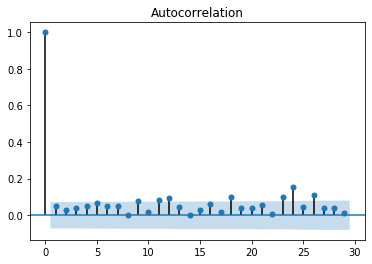

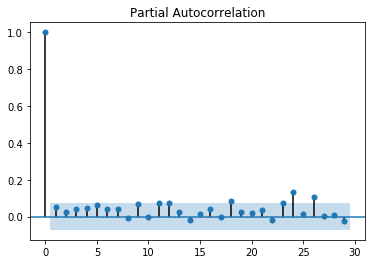

In [40]:
#%%script false
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(work_data.iloc[100])
plot_pacf(work_data.iloc[100])
pyplot.show()

Extracting data to be predicted

In [41]:
X_data = work_data[time_points[:-1]]

In [42]:
X_data.head()

Time,33 day,33 day,33 day,33 day,33 day,33 day,33 day,33 day,33 day,33 day,...,65 day,65 day,65 day,65 day,65 day,65 day,65 day,65 day,65 day,65 day
ENSG00000000003,0.009735,0.010765,0.097550,0.007142,0.039573,0.039254,0.029819,0.011140,0.028298,0.044176,...,0.000060,0.000548,0.010269,0.020130,0.000198,0.000370,0.000648,0.037225,0.036040,0.006841
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,0.000000,0.000000,0.011587,0.000000,0.000050,0.004454,0.004185,0.000000,0.006753,0.005164,...,0.000223,0.029412,0.000112,0.000285,0.000298,0.008308,0.000000,0.010195,0.029222,0.016135
ENSG00000000457,0.000248,0.001442,0.000736,0.000579,0.002009,0.000185,0.000180,0.000262,0.000876,0.000707,...,0.000280,0.000281,0.000463,0.001663,0.000676,0.000256,0.000000,0.000000,0.000285,0.000425
ENSG00000000460,0.000156,0.000098,0.000539,0.000943,0.009990,0.000189,0.000128,0.000199,0.006950,0.000070,...,0.000099,0.001040,0.000000,0.000372,0.000080,0.000000,0.000000,0.000000,0.000091,0.000000


In [43]:
y_data = work_data[time_points[-1]]
y_data.head()

Time,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,...,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
ENSG00000000003,0.000453,0.000155,0.00000,0.006944,0.000266,0.000508,0.000293,0.0,0.0,0.000000,...,0.000184,0.000943,0.000000,0.000119,0.000000,0.000463,0.000321,0.000710,0.000077,0.008006
ENSG00000000005,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,0.000000,0.001858,0.00000,0.006944,0.000000,0.001084,0.000000,0.0,0.0,0.016598,...,0.000000,0.001727,0.000000,0.000000,0.000000,0.000065,0.000000,0.000476,0.000000,0.000000
ENSG00000000457,0.000453,0.000198,0.00239,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000206,0.006726,0.000344,0.000578,0.000126,0.000217,0.006617,0.000183,0.000432,0.000416
ENSG00000000460,0.000000,0.002633,0.00000,0.000000,0.000532,0.000000,0.000000,0.0,0.0,0.000494,...,0.000000,0.010625,0.000228,0.000136,0.000000,0.005231,0.000087,0.000000,0.000116,0.000000


In [44]:
print(np.shape(X_data))
print(np.shape(y_data))

(19037, 508)
(19037, 226)


# DNN regressor

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import keras
from keras.utils.vis_utils import plot_model
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics.pairwise import euclidean_distances

In [80]:
tf.keras.backend.set_floatx('float64')

**Finding the best seed**

In [46]:
def MLP1(x_shape,y_shape):
    model = Sequential()
    model.add(Dense(350, input_dim=x_shape, kernel_initializer='uniform', activation="relu"))
    model.add(Dense(275, kernel_initializer='uniform', activation="relu"))
    model.add(Dense(y_shape, kernel_initializer='uniform', activation="linear"))
    model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mse'])
    return model

In [47]:
rnd_state,r2scores,msescores,maescores,pearsoncorr = [],[],[],[],[]
for i in np.random.randint(1,101,20):
    print('\nSeed = {}'.format(i))
    X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=i)
    model = MLP1(np.shape(X_train)[1],np.shape(y_train)[1])
    model.fit(np.array(X_train), np.array(y_train), epochs=10, batch_size=16, validation_split=0.2, shuffle=True)
    y_pred = model.predict(np.array(X_test))
    
    #results
    rnd_state.append(i)
    
    actual_mean = pd.DataFrame(y_test.mean(axis=1))
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    r2scores.append(r2_score(actual_mean, pred_mean))
    msescores.append(mean_squared_error(np.array(y_test), y_pred))
    maescores.append(mean_absolute_error(np.array(y_test), y_pred))
    
    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)


Seed = 86
Epoch 1/10
762/762 [==============================] - 5s 6ms/step - loss: 2.5512e-04 - mse: 2.5512e-04 - val_loss: 1.8625e-04 - val_mse: 1.8625e-04
Epoch 2/10
762/762 [==============================] - 5s 6ms/step - loss: 2.2119e-04 - mse: 2.2119e-04 - val_loss: 1.5420e-04 - val_mse: 1.5420e-04
Epoch 3/10
762/762 [==============================] - 5s 6ms/step - loss: 1.9788e-04 - mse: 1.9788e-04 - val_loss: 1.5330e-04 - val_mse: 1.5330e-04
Epoch 4/10
762/762 [==============================] - 5s 6ms/step - loss: 3.2461e-04 - mse: 3.2461e-04 - val_loss: 1.8087e-04 - val_mse: 1.8087e-04
Epoch 5/10
762/762 [==============================] - 5s 6ms/step - loss: 2.1229e-04 - mse: 2.1229e-04 - val_loss: 1.6974e-04 - val_mse: 1.6974e-04
Epoch 6/10
762/762 [==============================] - 5s 6ms/step - loss: 2.3535e-04 - mse: 2.3535e-04 - val_loss: 1.9720e-04 - val_mse: 1.9720e-04
Epoch 7/10
762/762 [==============================] - 4s 6ms/step - loss: 2.0142e-04 - mse: 2.0142e-0

In [48]:
result = pd.DataFrame(zip(rnd_state,r2scores,msescores,maescores,pearsoncorr))
result.columns = ['Seed','R2Score','MSE','MAE','Correlation Coeff.']
result.loc[len(rnd_state)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(rnd_state):'avg'},inplace=True)
result

,Seed,R2Score,MSE,MAE,Correlation Coeff.
0,86.0,0.790822,0.000200,0.004284,0.883099
1,16.0,0.544396,0.000331,0.004035,0.860709
2,65.0,0.950674,0.000206,0.004055,0.949589
3,35.0,0.800703,0.000273,0.004560,0.676159
4,15.0,0.916553,0.000145,0.003656,0.974744
5,88.0,0.355957,0.000297,0.004545,0.549745
6,23.0,0.937803,0.000143,0.003626,0.954562
7,58.0,0.885758,0.000207,0.004326,0.950333
8,91.0,0.744273,0.000153,0.003817,0.821110
9,56.0,0.615610,0.000248,0.003909,0.742342


In [49]:
result.to_csv(dir+'Results/EGEOD75140/bestSeed.csv')

Extracting results with repeated runs

**DNN with no dropout**

In [50]:
run,r2scores,msescores,maescores,pearsoncorr = [],[],[],[],[]
for i in range(10):
    print('\nRun = {}'.format(i+1))
    X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=81)
    model = MLP1(np.shape(X_train)[1],np.shape(y_train)[1])
    model.fit(np.array(X_train), np.array(y_train), epochs=10, batch_size=16, validation_split=0.2, shuffle=True)
    y_pred = model.predict(np.array(X_test))
    
    #results
    run.append(i+1)
    
    actual_mean = pd.DataFrame(y_test.mean(axis=1))
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    r2scores.append(r2_score(actual_mean, pred_mean))
    msescores.append(mean_squared_error(np.array(y_test), y_pred))
    maescores.append(mean_absolute_error(np.array(y_test), y_pred))
    
    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)


Run = 1
Epoch 1/10
762/762 [==============================] - 4s 6ms/step - loss: 2.7054e-04 - mse: 2.7054e-04 - val_loss: 2.5842e-04 - val_mse: 2.5842e-04
Epoch 2/10
762/762 [==============================] - 4s 6ms/step - loss: 2.0840e-04 - mse: 2.0840e-04 - val_loss: 3.5238e-04 - val_mse: 3.5238e-04
Epoch 3/10
762/762 [==============================] - 4s 6ms/step - loss: 2.2263e-04 - mse: 2.2263e-04 - val_loss: 2.9559e-04 - val_mse: 2.9559e-04
Epoch 4/10
762/762 [==============================] - 4s 6ms/step - loss: 1.8585e-04 - mse: 1.8585e-04 - val_loss: 2.1957e-04 - val_mse: 2.1957e-04
Epoch 5/10
762/762 [==============================] - 4s 6ms/step - loss: 2.1479e-04 - mse: 2.1479e-04 - val_loss: 2.7276e-04 - val_mse: 2.7276e-04
Epoch 6/10
762/762 [==============================] - 4s 6ms/step - loss: 1.9936e-04 - mse: 1.9936e-04 - val_loss: 2.2504e-04 - val_mse: 2.2504e-04
Epoch 7/10
762/762 [==============================] - 5s 6ms/step - loss: 1.7627e-04 - mse: 1.7627e-04 

In [51]:
result = pd.DataFrame(zip(run,r2scores,msescores,maescores,pearsoncorr))
result.columns = ['#Run','R2Score','MSE','MAE','Correlation Coeff.']
result.loc[len(run)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(run):'avg'},inplace=True)
result

,#Run,R2Score,MSE,MAE,Correlation Coeff.
0,1.0,0.838286,0.000189,0.004191,0.986082
1,2.0,0.795157,0.000217,0.004298,0.987857
2,3.0,0.875038,0.000180,0.004179,0.988235
3,4.0,0.929647,0.000177,0.004481,0.987123
4,5.0,0.920734,0.000175,0.004150,0.994868
5,6.0,0.751889,0.000211,0.004338,0.918369
6,7.0,0.900921,0.000189,0.004945,0.985436
7,8.0,0.869561,0.000184,0.004075,0.988803
8,9.0,0.751777,0.000209,0.005901,0.984710
9,10.0,0.945027,0.000166,0.004143,0.992090


In [52]:
result.to_csv(dir+'Results/EGEOD75140/DNN_noDropout_10runs.csv')

In [53]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 350)               178150    
_________________________________________________________________
dense_88 (Dense)             (None, 275)               96525     
_________________________________________________________________
dense_89 (Dense)             (None, 226)               62376     
Total params: 337,051
Trainable params: 337,051
Non-trainable params: 0
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


**DNN with 10% dropout all all layers**

In [81]:
def MLP2(x_shape,y_shape,rnd):
    model = Sequential()
    model.add(Dropout(0.1,seed=rnd))
    model.add(Dense(350, input_dim=x_shape, kernel_initializer='uniform', activation="relu"))
    model.add(Dropout(0.1,seed=rnd))
    model.add(Dense(275, kernel_initializer='uniform', activation="relu"))
    model.add(Dropout(0.1,seed=rnd))
    model.add(Dense(y_shape, kernel_initializer='uniform', activation="linear"))
    model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mse'])
    return model

In [82]:
run,r2scores,msescores,maescores,pearsoncorr = [],[],[],[],[]
for i in range(10):
    print('\nRun = {}'.format(i+1))
    X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=81)
    model = MLP2(np.shape(X_train)[1],np.shape(y_train)[1],81)
    model.fit(np.array(X_train), np.array(y_train), epochs=10, batch_size=16, validation_split=0.2, shuffle=True)
    y_pred = model.predict(np.array(X_test))
    
    #results
    run.append(i+1)
    
    actual_mean = pd.DataFrame(y_test.mean(axis=1))
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    r2scores.append(r2_score(actual_mean, pred_mean))
    msescores.append(mean_squared_error(np.array(y_test), y_pred))
    maescores.append(mean_absolute_error(np.array(y_test), y_pred))
    
    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)


Run = 1
Epoch 1/10
762/762 [==============================] - 10s 14ms/step - loss: 3.4814e-04 - mse: 3.4814e-04 - val_loss: 3.0982e-04 - val_mse: 3.0982e-04
Epoch 2/10
762/762 [==============================] - 10s 13ms/step - loss: 2.3160e-04 - mse: 2.3160e-04 - val_loss: 3.1378e-04 - val_mse: 3.1378e-04
Epoch 3/10
762/762 [==============================] - 10s 13ms/step - loss: 2.2952e-04 - mse: 2.2952e-04 - val_loss: 3.1303e-04 - val_mse: 3.1303e-04
Epoch 4/10
762/762 [==============================] - 10s 13ms/step - loss: 1.9172e-04 - mse: 1.9172e-04 - val_loss: 2.8150e-04 - val_mse: 2.8150e-04
Epoch 5/10
762/762 [==============================] - 10s 13ms/step - loss: 1.8375e-04 - mse: 1.8375e-04 - val_loss: 2.5666e-04 - val_mse: 2.5666e-04
Epoch 6/10
762/762 [==============================] - 10s 13ms/step - loss: 1.8211e-04 - mse: 1.8211e-04 - val_loss: 7.6707e-04 - val_mse: 7.6707e-04
Epoch 7/10
762/762 [==============================] - 10s 13ms/step - loss: 1.8692e-04 - ms

In [83]:
result = pd.DataFrame(zip(run,r2scores,msescores,maescores,pearsoncorr))
result.columns = ['#Run','R2Score','MSE','MAE', 'Correlation Coeff.']
result.loc[len(run)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(run):'avg'},inplace=True)
result

,#Run,R2Score,MSE,MAE,Correlation Coeff.
0,1.0,0.886429,0.000181,0.004198,0.990071
1,2.0,0.689397,0.000230,0.004840,0.971116
2,3.0,0.576506,0.000248,0.005149,0.971069
3,4.0,0.923627,0.000182,0.004131,0.986389
4,5.0,0.774507,0.000231,0.004423,0.994018
5,6.0,0.883063,0.000196,0.004211,0.977817
6,7.0,0.894151,0.000180,0.004066,0.988243
7,8.0,0.866124,0.000185,0.004300,0.989060
8,9.0,0.912650,0.000173,0.004026,0.990986
9,10.0,0.764937,0.000240,0.004468,0.975452


In [84]:
result.to_csv(dir+'Results/EGEOD75140/DNN_10PercentDropout_10runs.csv')

In [85]:
model.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_87 (Dropout)         multiple                  0         
_________________________________________________________________
dense_177 (Dense)            multiple                  178150    
_________________________________________________________________
dropout_88 (Dropout)         multiple                  0         
_________________________________________________________________
dense_178 (Dense)            multiple                  96525     
_________________________________________________________________
dropout_89 (Dropout)         multiple                  0         
_________________________________________________________________
dense_179 (Dense)            multiple                  62376     
Total params: 337,051
Trainable params: 337,051
Non-trainable params: 0
_______________________________________________

**DNN with 10% dropout at input layer and 20% dropout at hidden layers**

In [86]:
def MLP3(x_shape,y_shape,rnd):
    model = Sequential()
    model.add(Dropout(0.1,seed=rnd))
    model.add(Dense(350, input_dim=x_shape, kernel_initializer='uniform', activation="relu"))
    model.add(Dropout(0.2,seed=rnd))
    model.add(Dense(275, kernel_initializer='uniform', activation="relu"))
    model.add(Dropout(0.2,seed=rnd))
    model.add(Dense(y_shape, kernel_initializer='uniform', activation="linear"))
    model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mse'])
    return model

In [87]:
run,r2scores,msescores,maescores,pearsoncorr = [],[],[],[],[]
for i in range(10):
    print('\nRun = {}'.format(i+1))
    X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=81)
    model = MLP3(np.shape(X_train)[1],np.shape(y_train)[1],81)
    model.fit(np.array(X_train), np.array(y_train), epochs=10, batch_size=16, validation_split=0.2, shuffle=True)
    y_pred = model.predict(np.array(X_test))
    
    #results
    run.append(i+1)
    
    actual_mean = pd.DataFrame(y_test.mean(axis=1))
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    r2scores.append(r2_score(actual_mean, pred_mean))
    msescores.append(mean_squared_error(np.array(y_test), y_pred))
    maescores.append(mean_absolute_error(np.array(y_test), y_pred))
    
    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)


Run = 1
Epoch 1/10
762/762 [==============================] - 10s 13ms/step - loss: 2.4277e-04 - mse: 2.4277e-04 - val_loss: 2.4907e-04 - val_mse: 2.4907e-04
Epoch 2/10
762/762 [==============================] - 10s 13ms/step - loss: 2.0407e-04 - mse: 2.0407e-04 - val_loss: 2.8605e-04 - val_mse: 2.8605e-04
Epoch 3/10
762/762 [==============================] - 10s 13ms/step - loss: 2.0681e-04 - mse: 2.0681e-04 - val_loss: 3.3235e-04 - val_mse: 3.3235e-04
Epoch 4/10
762/762 [==============================] - 10s 13ms/step - loss: 2.0126e-04 - mse: 2.0126e-04 - val_loss: 3.1125e-04 - val_mse: 3.1125e-04
Epoch 5/10
762/762 [==============================] - 9s 12ms/step - loss: 2.2467e-04 - mse: 2.2467e-04 - val_loss: 2.9239e-04 - val_mse: 2.9239e-04
Epoch 6/10
762/762 [==============================] - 10s 13ms/step - loss: 1.9083e-04 - mse: 1.9083e-04 - val_loss: 2.4440e-04 - val_mse: 2.4440e-04
Epoch 7/10
762/762 [==============================] - 10s 13ms/step - loss: 2.4122e-04 - mse

In [88]:
result = pd.DataFrame(zip(run,r2scores,msescores,maescores,pearsoncorr))
result.columns = ['#Run','R2Score','MSE','MAE','Correlation Coeff.']
result.loc[len(run)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(run):'avg'},inplace=True)
result

,#Run,R2Score,MSE,MAE,Correlation Coeff.
0,1.0,0.711825,0.000218,0.004638,0.993124
1,2.0,0.828553,0.000204,0.003868,0.991449
2,3.0,0.827131,0.000192,0.004181,0.992584
3,4.0,0.797973,0.000222,0.004048,0.988535
4,5.0,0.911359,0.000188,0.004654,0.992954
5,6.0,0.819778,0.000250,0.004406,0.975915
6,7.0,0.196189,0.000343,0.004317,0.977341
7,8.0,0.670804,0.000224,0.004849,0.972601
8,9.0,0.783868,0.000216,0.003902,0.977184
9,10.0,0.634685,0.000274,0.004471,0.982888


In [89]:
result.to_csv(dir+'Results/EGEOD75140/DNN_10Percent20PercentDropout_10runs.csv')

In [90]:
model.summary()

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_117 (Dropout)        multiple                  0         
_________________________________________________________________
dense_207 (Dense)            multiple                  178150    
_________________________________________________________________
dropout_118 (Dropout)        multiple                  0         
_________________________________________________________________
dense_208 (Dense)            multiple                  96525     
_________________________________________________________________
dropout_119 (Dropout)        multiple                  0         
_________________________________________________________________
dense_209 (Dense)            multiple                  62376     
Total params: 337,051
Trainable params: 337,051
Non-trainable params: 0
_______________________________________________

# Benchmarking

In [64]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Linear Regression

In [65]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

rnd_state_lr,r2scores_lr,msescores_lr,maescores_lr,pearsoncorr = [],[],[],[],[]

for i in range(10):
    print('\nRun = {}'.format(i+1))
    X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=81)
    linear_Regr = LinearRegression(normalize=True)
    linear_Regr.fit(X_train, y_train)
    y_pred = linear_Regr.predict(X_test)

    run.append(i+1)

    actual_mean = pd.DataFrame(y_test.mean(axis=1))
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    r2scores_lr.append(r2_score(actual_mean, pred_mean))
    msescores_lr.append(mean_squared_error(y_test, y_pred))
    maescores_lr.append(mean_absolute_error(y_test, y_pred))
    
    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)


Run = 1

Run = 2

Run = 3

Run = 4

Run = 5

Run = 6

Run = 7

Run = 8

Run = 9

Run = 10


In [66]:
result = pd.DataFrame(zip(run,r2scores_lr,msescores_lr,maescores_lr,pearsoncorr))
result.columns = ['#Run','R2Score','MSE','MAE','Correlation Coeff.']
result.loc[len(run)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(run):'avg'},inplace=True)
result

,#Run,R2Score,MSE,MAE,Correlation Coeff.
0,1.0,0.693563,0.000225,0.004599,0.984159
1,2.0,0.693563,0.000225,0.004599,0.984159
2,3.0,0.693563,0.000225,0.004599,0.984159
3,4.0,0.693563,0.000225,0.004599,0.984159
4,5.0,0.693563,0.000225,0.004599,0.984159
5,6.0,0.693563,0.000225,0.004599,0.984159
6,7.0,0.693563,0.000225,0.004599,0.984159
7,8.0,0.693563,0.000225,0.004599,0.984159
8,9.0,0.693563,0.000225,0.004599,0.984159
9,10.0,0.693563,0.000225,0.004599,0.984159


In [67]:
result.to_csv(dir+'Results/EGEOD75140/LinearRegression_10runs.csv')

# Lasso

In [68]:
from sklearn.linear_model import Lasso

alpha,ls_r2,ls_mse,ls_mae,pearsoncorr = [],[],[],[],[]
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=81)
actual_mean = pd.DataFrame(y_test.mean(axis=1))

#for alp in [0.01,0.05,0.1,0.2,0.5,1,2,2.5,5,10]:
for alp in [0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5]:
    print('Working with alpha =',alp)
    Lasso_Regr = Lasso(alpha=alp, normalize=True)
    Lasso_Regr.fit(X_train,y_train)
    y_pred = Lasso_Regr.predict(X_test)
    
    alpha.append(alp)
    
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    ls_r2.append(r2_score(actual_mean, pred_mean))
    ls_mse.append(mean_squared_error(y_test, y_pred))
    ls_mae.append(mean_absolute_error(y_test, y_pred))
    
    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)

Working with alpha = 1e-05
Working with alpha = 5e-05
Working with alpha = 0.0001
Working with alpha = 0.0005


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Working with alpha = 0.001


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Working with alpha = 0.005


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Working with alpha = 0.01


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Working with alpha = 0.05


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Working with alpha = 0.1


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Working with alpha = 0.5


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [69]:
result = pd.DataFrame(zip(alpha,ls_r2,ls_mse,ls_mae,pearsoncorr))
result.columns = ['Alpha','R2Score','MSE','MAE','Correlation Coeff.']
result.loc[len(alpha)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(alpha):'avg'},inplace=True)
result

,Alpha,R2Score,MSE,MAE,Correlation Coeff.
0,0.000010,0.801662,0.000187,0.003609,0.981755
1,0.000050,0.872085,0.000176,0.004086,0.980781
2,0.000100,0.260974,0.000305,0.004976,0.984559
3,0.000500,-0.000248,0.000366,0.005258,NaN
4,0.001000,-0.000248,0.000366,0.005258,NaN
5,0.005000,-0.000248,0.000366,0.005258,NaN
6,0.010000,-0.000248,0.000366,0.005258,NaN
7,0.050000,-0.000248,0.000366,0.005258,NaN
8,0.100000,-0.000248,0.000366,0.005258,NaN
9,0.500000,-0.000248,0.000366,0.005258,NaN


In [70]:
result.to_csv(dir+'Results/EGEOD75140/LassoRegression_10runs.csv')

# Ridge

In [71]:
from sklearn.linear_model import Ridge

alpha,rg_r2,rg_mse,rg_mae,pearsoncorr = [],[],[],[],[]
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=81)
actual_mean = pd.DataFrame(y_test.mean(axis=1))

for alp in [0.01,0.05,0.1,0.5,1,2,3,4,5,10]:
    print('Working with alpha = ',alp)
    Ridge_Regr = Ridge(alpha=alp, normalize=True)
    Ridge_Regr.fit(X_train, y_train)
    y_pred = Ridge_Regr.predict(X_test)
    
    alpha.append(alp)
    
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    rg_r2.append(r2_score(actual_mean, pred_mean))
    rg_mse.append(mean_squared_error(y_test, y_pred))
    rg_mae.append(mean_absolute_error(y_test, y_pred))
    
    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)

Working with alpha =  0.01
Working with alpha =  0.05
Working with alpha =  0.1
Working with alpha =  0.5
Working with alpha =  1
Working with alpha =  2
Working with alpha =  3
Working with alpha =  4
Working with alpha =  5
Working with alpha =  10


In [72]:
result = pd.DataFrame(zip(alpha,rg_r2,rg_mse,rg_mae,pearsoncorr))
result.columns = ['Alpha','R2Score','MSE','MAE','Correlation Coeff.']
result.loc[len(alpha)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(alpha):'avg'},inplace=True)
result

,Alpha,R2Score,MSE,MAE,Correlation Coeff.
0,0.010,0.695894,0.000221,0.004499,0.984003
1,0.050,0.700956,0.000213,0.004264,0.983571
2,0.100,0.702576,0.000209,0.004113,0.983194
3,0.500,0.700679,0.000201,0.003774,0.981892
4,1.000,0.711219,0.000198,0.003672,0.981539
5,2.000,0.743596,0.000191,0.003609,0.981720
6,3.000,0.774240,0.000185,0.003591,0.982173
7,4.000,0.800362,0.000180,0.003585,0.982676
8,5.000,0.822356,0.000176,0.003584,0.983175
9,10.000,0.891984,0.000162,0.003599,0.985333


In [73]:
result.to_csv(dir+'Results/EGEOD75140/RidgeRegression_10runs.csv')

# k-NN

In [74]:
from sklearn.neighbors import KNeighborsRegressor

knn,knn_r2,knn_mse,knn_mae=[],[],[],[]
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=81)
actual_mean = pd.DataFrame(y_test.mean(axis=1))

for k in [1,5,9,11,15,19,21,25,29,31]:
    print('k=',k)
    knn_Regr = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    knn_Regr.fit(X_train, y_train)
    y_pred = knn_Regr.predict(X_test)
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    knn.append(k)
    knn_r2.append(r2_score(actual_mean, pred_mean))
    knn_mse.append(mean_squared_error(y_test, y_pred))
    knn_mae.append(mean_absolute_error(y_test, y_pred))

    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)

k= 1
k= 5
k= 9
k= 11
k= 15
k= 19
k= 21
k= 25
k= 29
k= 31


In [75]:
result = pd.DataFrame(zip(knn,knn_r2,knn_mse,knn_mae,pearsoncorr))
result.columns = ['k','R2Score','MSE','MAE','Correlation Coeff.']
result.loc[len(knn)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(knn):'avg'},inplace=True)
result

,k,R2Score,MSE,MAE,Correlation Coeff.
0,1.0,0.897643,0.000204,0.003401,0.984003
1,5.0,0.773567,0.000189,0.003159,0.983571
2,9.0,0.790005,0.000188,0.003141,0.983194
3,11.0,0.773474,0.000190,0.003131,0.981892
4,15.0,0.727794,0.000200,0.003135,0.981539
5,19.0,0.679658,0.000210,0.003141,0.981720
6,21.0,0.664758,0.000213,0.003139,0.982173
7,25.0,0.628540,0.000221,0.003141,0.982676
8,29.0,0.611928,0.000225,0.003143,0.983175
9,31.0,0.600038,0.000227,0.003144,0.985333


In [76]:
result.to_csv(dir+'Results/EGEOD75140/kNNRegression_10runs.csv')

# Random Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor

estimators,rf_r2,rf_mse,rf_mae,pearsoncorr = [],[],[],[],[]
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=81)
actual_mean = pd.DataFrame(y_test.mean(axis=1))

for est in [1,2,3,4,5,6,7,8,9,10]:
    print('estimators = ',est)
    rf_Regr = RandomForestRegressor(n_estimators=est, n_jobs=-1)
    rf_Regr.fit(X_train, y_train)
    y_pred = rf_Regr.predict(X_test)
    
    estimators.append(est)
    
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    rf_r2.append(r2_score(actual_mean, pred_mean))
    rf_mse.append(mean_squared_error(y_test, y_pred))
    rf_mae.append(mean_absolute_error(y_test, y_pred))
    
    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)

estimators =  1
estimators =  2
estimators =  3
estimators =  4
estimators =  5
estimators =  6
estimators =  7
estimators =  8
estimators =  9
estimators =  10


In [78]:
result = pd.DataFrame(zip(estimators,rf_r2,rf_mse,rf_mae,pearsoncorr))
result.columns = ['Estimators','R2Score','MSE','MAE','Correlation Coeff.']
result.loc[len(estimators)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(estimators):'avg'},inplace=True)
result

,Estimators,R2Score,MSE,MAE,Correlation Coeff.
0,1.0,0.713648,0.000362,0.004603,0.895836
1,2.0,0.869965,0.000241,0.004131,0.968224
2,3.0,0.765845,0.000234,0.004057,0.921915
3,4.0,0.877948,0.000205,0.003985,0.982253
4,5.0,0.872770,0.000195,0.003880,0.978603
5,6.0,0.906205,0.000188,0.003874,0.991350
6,7.0,0.920334,0.000183,0.003819,0.986838
7,8.0,0.890108,0.000183,0.003808,0.984276
8,9.0,0.910532,0.000177,0.003779,0.988963
9,10.0,0.869386,0.000183,0.003780,0.989246


In [79]:
result.to_csv(dir+'Results/EGEOD75140/RFRegression_10runs.csv')